In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from itertools import product
import matplotlib.colors as colors
from fanalysis.mca import MCA

In [2]:
labels_dir = Path("../data/raw/labels")

In [3]:
csv_files = labels_dir.iterdir()

dfs_init = {csv_file.stem: pd.read_csv(csv_file) for csv_file in csv_files}

In [4]:
list(dfs_init.keys())

['pom_extra_sqa_mono_results',
 'extreme_sentiment_results',
 'mosi_pom_output',
 'Batch_2980374_batch_results',
 '5000_batch_raw',
 'mturk_extra_v2']

In [5]:
for name, df in dfs_init.items():
    print(name)
    display(df)
    print("="*80)

pom_extra_sqa_mono_results


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:37:02 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
1,301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:37:02 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,1,0,morsel,healer,district,1,0,0,NaN,NaN
2,301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:37:02 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},1,0,0,NaN,NaN
3,301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:37:49 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,morsel,healer,district,0,0,0,NaN,NaN
4,301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:37:49 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19633,3ZZAYRN1I63WMME0HKV3B0RL97GOTL,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:40:42 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
19634,3ZZAYRN1I63WMME0HKV3B0RL97GOTL,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:40:42 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,1,0,{},{},{},0,0,0,NaN,NaN
19635,3ZZAYRN1I63WMME0HKV3B0RL97GTOQ,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:40:39 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
19636,3ZZAYRN1I63WMME0HKV3B0RL97GTOQ,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Wed Nov 08 14:40:39 PST 2017,3,BatchId:3002203;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN


extreme_sentiment_results


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,3909MD9T2ZT0RQJASMNIPKI6DJEFEL,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:34 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,2,{},{},{},2,0,0,NaN,NaN
1,3909MD9T2ZT0RQJASMNIPKI6DJEFEL,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:34 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,1,0,{},{},{},0,0,0,NaN,NaN
2,3909MD9T2ZT0RQJASMNIPKI6DJEFEL,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:34 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},1,0,0,NaN,NaN
3,3J9L0X0VDFYL7GEOA0HW1U3VHPO9W3,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:33 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
4,3J9L0X0VDFYL7GEOA0HW1U3VHPO9W3,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:33 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,2,0,morsel,healer,district,2,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,3NOEP8XAU4ELO3ZL1U9FP3HHVVCPX7,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:52 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,1,0,NaN,NaN
4217,3NOEP8XAU4ELO3ZL1U9FP3HHVVCPX7,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:52 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},1,0,0,NaN,NaN
4218,356ZPKYPUHTAO8PV6QVH8HOQX16PYD,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:53 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},1,0,0,NaN,NaN
4219,356ZPKYPUHTAO8PV6QVH8HOQX16PYD,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Nov 04 10:01:53 PDT 2017,3,BatchId:2996706;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},-2,0,0,NaN,NaN


mosi_pom_output


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,3S37Y8CWI8CKAA8CT5L5KMSFV1W4WW,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:35:54 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,2,{},{},{},-3,0,0,NaN,NaN
1,3S37Y8CWI8CKAA8CT5L5KMSFV1W4WW,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:35:54 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,1,{},{},{},-2,0,0,NaN,NaN
2,3S37Y8CWI8CKAA8CT5L5KMSFV1W4WW,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:35:54 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},-1,0,0,NaN,NaN
3,3BAKUKE49HOYAFU77TSXZPDVR271RD,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:35:47 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
4,3BAKUKE49HOYAFU77TSXZPDVR271RD,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:35:47 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13651,3ZVPAMTJWNFVEUKAPCD06CH1TRTRG6,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:38:50 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
13652,3ZVPAMTJWNFVEUKAPCD06CH1TRTRG6,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:38:50 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},1,0,0,NaN,NaN
13653,30OITAWPBQF3AQJZF1VW0RT8250H98,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:38:50 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,3,0,{},{},{},3,0,0,NaN,NaN
13654,30OITAWPBQF3AQJZF1VW0RT8250H98,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Nov 05 18:38:50 PST 2017,3,BatchId:2997751;OriginalHitTemplateId:926051491;,900,...,0,2,{},{},{},0,0,0,NaN,NaN


Batch_2980374_batch_results


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,3MIVREZQVHA04F1T2O9FZEZP3KFQK9,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:49:38 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,1,{},{},{},-1,0,0,NaN,NaN
1,3MIVREZQVHA04F1T2O9FZEZP3KFQK9,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:49:38 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,0,morsel,healer,district,1,0,0,NaN,NaN
2,3MIVREZQVHA04F1T2O9FZEZP3KFQK9,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:49:38 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},-1,0,0,NaN,NaN
3,3N7PQ0KLI515BE3H8RMGOBT99V53EZ,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:49:39 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,1,0,{},{},{},2,0,0,NaN,NaN
4,3N7PQ0KLI515BE3H8RMGOBT99V53EZ,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:49:39 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,1,0,{},{},{},0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,3DFYDSXB2WCXLO2S1CT880W1RGMUJK,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:50:42 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
7493,3DFYDSXB2WCXLO2S1CT880W1RGMUJK,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:50:42 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
7494,3SZYX62S5GCNGEBBZ2W3XYZC14U759,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:50:42 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},-1,0,0,NaN,NaN
7495,3SZYX62S5GCNGEBBZ2W3XYZC14U759,3PFYYPJUJWHYRI6DU6S4AQHSUXDZ2H,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sun Oct 22 13:50:42 PDT 2017,3,BatchId:2980374;OriginalHitTemplateId:926051491;,900,...,0,2,{},{},{},-1,0,0,NaN,NaN


5000_batch_raw


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,3XUSYT70ITD42GQKT9TDGVDH7MS0DB,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:33:29 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},-2.0,0.0,0.0,NaN,NaN
1,3XUSYT70ITD42GQKT9TDGVDH7MS0DB,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:33:29 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,1.0,morsel,healer,district,-1.0,1.0,0.0,NaN,NaN
2,3XUSYT70ITD42GQKT9TDGVDH7MS0DB,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:33:29 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},0.0,0.0,0.0,NaN,NaN
3,3YO4AH2FPDWYRPUPYVZXGUKGQ1GQ05,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:32:54 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},0.0,0.0,0.0,NaN,NaN
4,3YO4AH2FPDWYRPUPYVZXGUKGQ1GQ05,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:32:54 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,1.0,0.0,morsel,healer,district,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3H1C3QRA01VTOEZ01KXHHEX3GNTCEC,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:36:14 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},2.0,0.0,0.0,NaN,NaN
14996,3H1C3QRA01VTOEZ01KXHHEX3GNTCEC,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:36:14 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},0.0,0.0,0.0,NaN,NaN
14997,3UEDKCTP9V2QYXWE6P09ZNIUZ9YK7B,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:36:14 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},2.0,0.0,0.0,NaN,NaN
14998,3UEDKCTP9V2QYXWE6P09ZNIUZ9YK7B,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Sat Oct 28 15:36:14 PDT 2017,3,BatchId:2988081;OriginalHitTemplateId:926051491;,900,...,0.0,0.0,{},{},{},0.0,0.0,0.0,NaN,NaN


mturk_extra_v2


,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.happiness,Answer.sadness,Answer.secret_word1,Answer.secret_word2,Answer.secret_word3,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
0,366FYU4PTG1B7CBOTXEF5XABMQSEK6,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:23:37 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,1,0,morsel,healer,district,0,0,0,NaN,NaN
1,366FYU4PTG1B7CBOTXEF5XABMQSEK6,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:23:37 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
2,366FYU4PTG1B7CBOTXEF5XABMQSEK6,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:23:37 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
3,37S0QRNUFBSA3AZW75VCNI5YGN088I,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:23:29 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
4,37S0QRNUFBSA3AZW75VCNI5YGN088I,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:23:29 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,31JUPBOORNG5IHJF1U4GSNR40N28L7,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:25:55 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,2,0,{},{},{},2,0,0,NaN,NaN
10790,31JUPBOORNG5IHJF1U4GSNR40N28L7,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:25:55 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
10791,3RKHNXPHGW8SW88AJXTK9FWE8EPKUW,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:25:55 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN
10792,3RKHNXPHGW8SW88AJXTK9FWE8EPKUW,310F0WGLWJM86SJMYKLR3YFKF1FLT9,MOSI2 Video Annotation,Watch a short video clip and answer a single s...,sentiment,$0.10,Tue Nov 07 16:25:55 PST 2017,3,BatchId:3000910;OriginalHitTemplateId:926051491;,900,...,0,0,{},{},{},0,0,0,NaN,NaN


In [6]:
dfs_init["pom_extra_sqa_mono_results"].columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.VIDEO_ID',
       'Input.CLIP', 'Answer.anger', 'Answer.disgust', 'Answer.fear',
       'Answer.gender', 'Answer.happiness', 'Answer.sadness',
       'Answer.secret_word1', 'Answer.secret_word2', 'Answer.secret_word3',
       'Answer.sentiment', 'Answer.surprise', 'Answer.video_load', 'Approve',
       'Reject'],
      dtype='object')

La plupart des colonnes qu'on voit sont inutiles.

In [7]:
dfs_init["pom_extra_sqa_mono_results"].describe()

,MaxAssignments,AssignmentDurationInSeconds,AutoApprovalDelayInSeconds,NumberOfSimilarHITs,LifetimeInSeconds,ApprovalTime,RejectionTime,RequesterFeedback,WorkTimeInSeconds,Input.CLIP,...,Answer.disgust,Answer.fear,Answer.gender,Answer.happiness,Answer.sadness,Answer.sentiment,Answer.surprise,Answer.video_load,Approve,Reject
count,19638.0,19638.0,19638.0,0.0,0.0,0.0,0.0,0.0,19638.000000,19638.000000,...,19638.000000,19638.000000,19638.0,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,0.0,0.0
mean,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,71.553366,5.712496,...,0.126337,0.020776,0.0,0.426265,0.137132,0.055148,0.059375,0.000662,NaN,NaN
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,125.707387,5.290929,...,0.458468,0.185748,0.0,0.768144,0.472048,1.201060,0.302320,0.025721,NaN,NaN
min,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,-3.000000,0.000000,0.000000,NaN,NaN
25%,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,16.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,28.000000,5.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,54.000000,8.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
max,3.0,900.0,259200.0,NaN,NaN,NaN,NaN,NaN,895.000000,49.000000,...,3.000000,3.000000,0.0,3.000000,3.000000,3.000000,3.000000,1.000000,NaN,NaN


Le sentiment varie de -3 à 3.

Les émotions varient de 0 à 3.

In [8]:
for name, df in dfs_init.items():
    print(name)
    for col in ['WorkerId', 'AssignmentId', 'HITId']:
        print(" " * 4, col, df[col].drop_duplicates().count())

pom_extra_sqa_mono_results
     WorkerId 48
     AssignmentId 19638
     HITId 6546
extreme_sentiment_results
     WorkerId 21
     AssignmentId 4221
     HITId 1407
mosi_pom_output
     WorkerId 40
     AssignmentId 13656
     HITId 4552
Batch_2980374_batch_results
     WorkerId 45
     AssignmentId 7497
     HITId 2499
5000_batch_raw
     WorkerId 43
     AssignmentId 15000
     HITId 5000
mturk_extra_v2
     WorkerId 47
     AssignmentId 10794
     HITId 3598


Nous avons 3 fois plus de HITId que de AssignementId, donc 3 annotations par texte.

Annotation distribution:

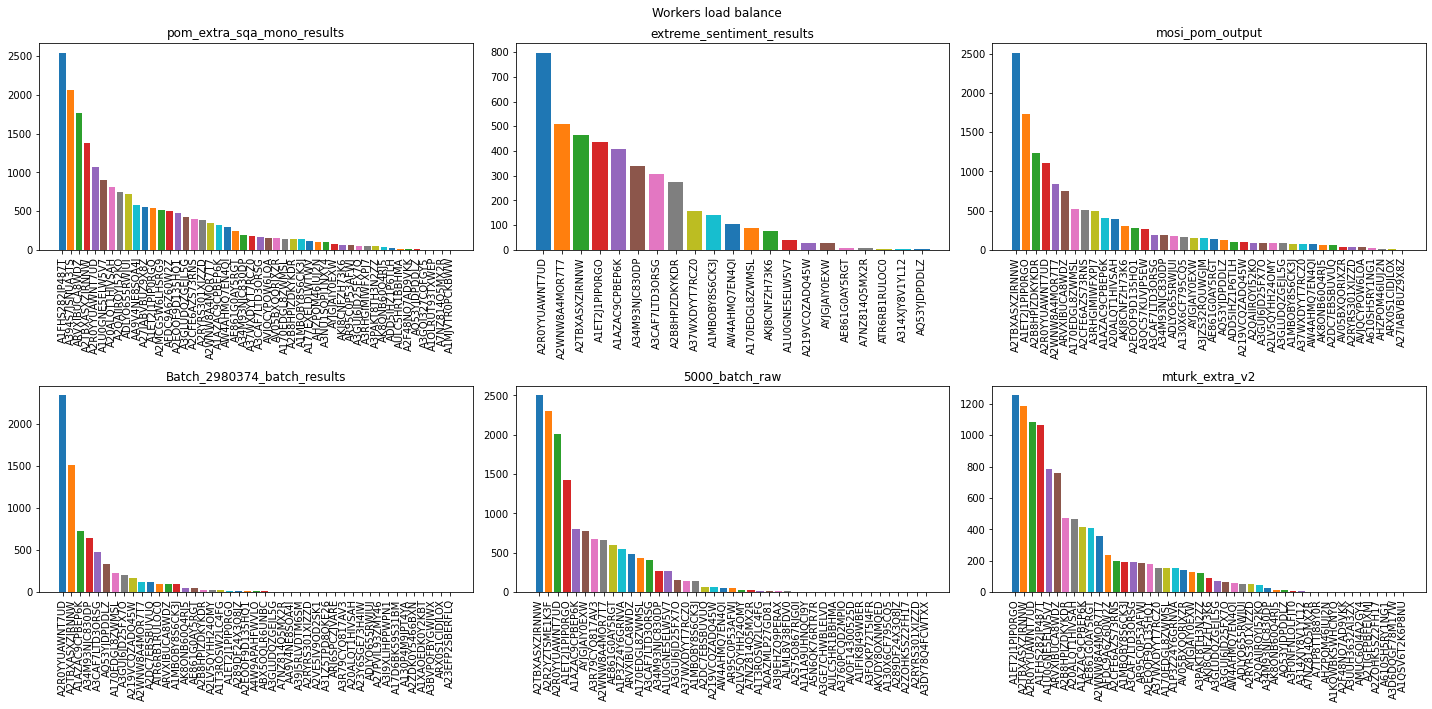

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle("Workers load balance")

worker_distributions = {name: df['WorkerId'].value_counts() for name, df in dfs_init.items()}

for (name, worker_distribution), (i,j) in zip(worker_distributions.items(), product(range(2),range(3))):
    axes[i,j].bar(x=worker_distribution.index, height=worker_distribution.values, color=colors.TABLEAU_COLORS)
    axes[i,j].set_title(name)
    axes[i,j].tick_params(axis='x', labelrotation=90)
fig.tight_layout()

In [10]:
emotions = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
emotions_cols = [f'Answer.{emotion}' for emotion in emotions]
sentiment_col = 'Answer.sentiment'

dfs = {name: df[['HITId'] + emotions_cols + [sentiment_col]].set_index(df['AssignmentId']) for name, df in dfs_init.items()}

In [11]:
for name, df in dfs.items():
    print(name, ":")
    print(df.isnull().sum(), "\n")

pom_extra_sqa_mono_results :
HITId               0
Answer.anger        0
Answer.disgust      0
Answer.fear         0
Answer.happiness    0
Answer.sadness      0
Answer.surprise     0
Answer.sentiment    0
dtype: int64 

extreme_sentiment_results :
HITId               0
Answer.anger        0
Answer.disgust      0
Answer.fear         0
Answer.happiness    0
Answer.sadness      0
Answer.surprise     0
Answer.sentiment    0
dtype: int64 

mosi_pom_output :
HITId               0
Answer.anger        0
Answer.disgust      0
Answer.fear         0
Answer.happiness    0
Answer.sadness      0
Answer.surprise     0
Answer.sentiment    0
dtype: int64 

Batch_2980374_batch_results :
HITId               0
Answer.anger        0
Answer.disgust      0
Answer.fear         0
Answer.happiness    0
Answer.sadness      0
Answer.surprise     0
Answer.sentiment    0
dtype: int64 

5000_batch_raw :
HITId                0
Answer.anger        47
Answer.disgust      49
Answer.fear         47
Answer.happiness    47

In [12]:
dfs["5000_batch_raw"].isnull().any(axis=1).value_counts()

False    14922
True        78
dtype: int64

Nous avons 78 lignes avec valeurs manquantes.

In [13]:
missing = dfs["5000_batch_raw"][dfs["5000_batch_raw"].isnull().any(axis=1)]

In [14]:
display(missing.head(60))
display(missing.tail(18))

,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
AssignmentId,,,,,,,,
3FTF2T8WLSUOU0BI02MYPDYF0CN9W3,3J5XXLQDHMNMDPP33HBQOFHVA5G3V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3A7Y0R2P2P0SPCTHWJ9XGQQP5J8JX4,3V7ICJJAZASSM7A1YEP9X8FULDWB4V,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3VNL7UK1XGV53TY18JHFCPDRZG7TFW,3IYI9285WSC1ZULSFL88EUAVLVMJC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Y5140Z9DYSRLS7KSAEGACPMQ5OPIO,36JW4WBR06WCB0ACINVOANFJ5GBFH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3QL2OFSM97U05497KL52VKMWDMFNC2,3PN6H8C9R4203TO2LBQ651PUG85DAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3A4TN5196LU8V8NWHNAPQ0P0RA7CHJ,3YGYP13641L1OM1WCGQVWWQYUGURNJ,0.0,0.0,0.0,0.0,0.0,NaN,0.0
39ZSFO5CA98088ZMREYAWJRLB1EUJA,3KLL7H3EGDD17XW2I20SS9I5TAZHVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3NPI0JQDAPHHU6NVMMDKOJRV1NLTPS,391JB9X4ZYK9J031AV2YI5FKUYRKMK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3HFNH7HEMIQYPD242ZT2P52GGOQQGW,3PMR2DOWOODQXRTSX4YWUMF2BHB45O,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
AssignmentId,,,,,,,,
32VNZTT0A8GIPYOKKDG1L6FIM6BR45,35YHTYFL1GFHT15WNCCSPO6SDVMVFA,0.0,NaN,0.0,0.0,0.0,0.0,1.0
3F1567XTNXHJA3FWOTNSXOGTCCM9QH,3MGHRFQY2L170RLBP5GRTGNIPA00YL,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3570Y55XZQV7YFTQT9AW2R5IFYYGYI,3ULIZ0H1VAH95SW9AMFUWO8ZZX2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3P1L2B7AD21BQT3PYDYEDSCOX5KOLK,3HUR21WDDU1FXHRMSH5Y2UATZHKXYC,0.0,NaN,0.0,1.0,0.0,0.0,2.0
3VJ40NV2QJZZ96BU7M05ZJM5RIHTO3,3OID399FXGJVZK5AWRCYJ20LDOJDFU,NaN,0.0,0.0,0.0,0.0,0.0,0.0
30MVJZJNHNP2OGBJT33J0N47YJS9JS,3UYRNV2KITBV6HM0D7KV5FVT4O8N85,0.0,1.0,0.0,1.0,0.0,NaN,-2.0
3KGTPGBS6YX02C1EKTSIX2549TE2UN,3EAWOID6MT9QWXQ6KUT7MHJO7TYV07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3PM8NZGV8ZS9BZXUR9T6DR2BJH9XQO,3JUDR1D0D635NZX3DI3BZIDVNZ3Q2S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384PI804XTDDRP6WG1T4ZDU1RYG0SS,34R0BODSP1B8PTQLMAA938RTO67E56,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour ces observations, nous avons des données manquantes partielles ou complètes.

In [15]:
dfs["5000_batch_raw"] = dfs["5000_batch_raw"].dropna()
dfs["5000_batch_raw"].shape

(14922, 8)

In [16]:
def plot_emotions_modalities(dataframes):
    for emotion in emotions:
        df_distributions = [dataframes[df][f'Answer.{emotion}'].value_counts() for df in dataframes]
        fig, axes = plt.subplots(1, len(df_distributions), figsize=(20,4))
        fig.suptitle(emotion)

        fig.tight_layout()
        for i in range(len(dataframes)):
            axes[i].bar(df_distributions[i].index, df_distributions[i].values, color=colors.TABLEAU_COLORS)
            axes[i].set_title(list(dataframes.keys())[i])
        plt.show()
        print("━"*125)

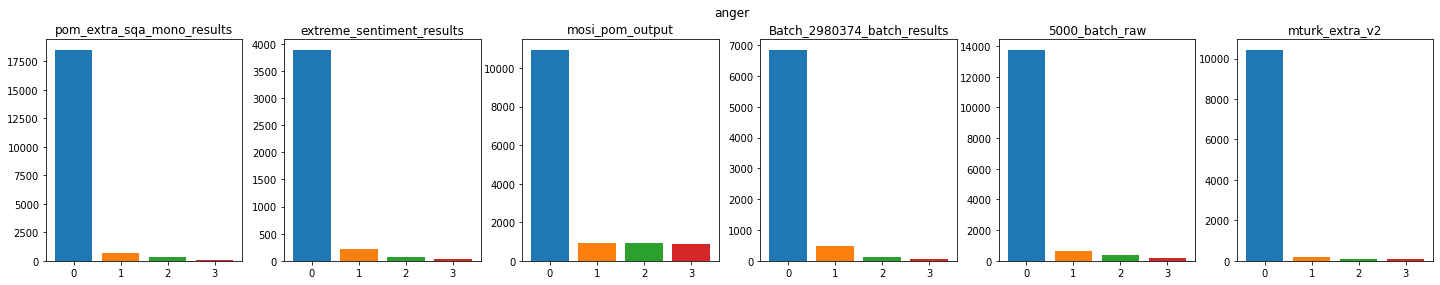

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


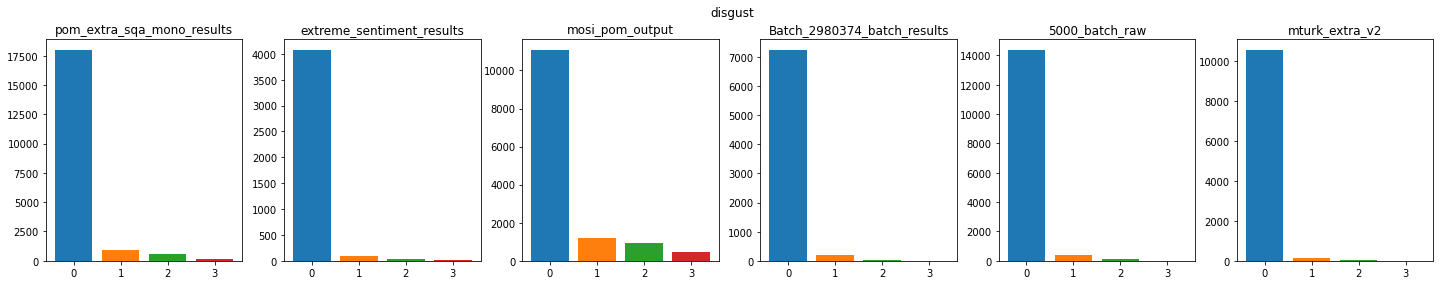

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


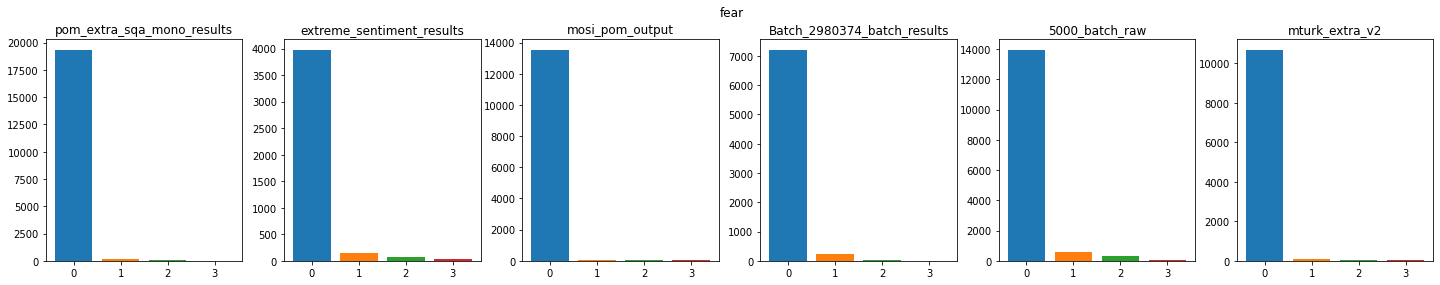

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


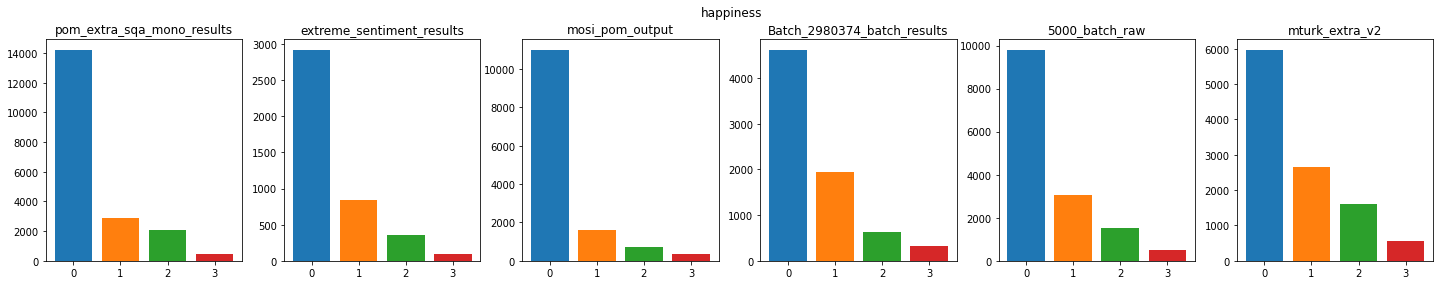

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


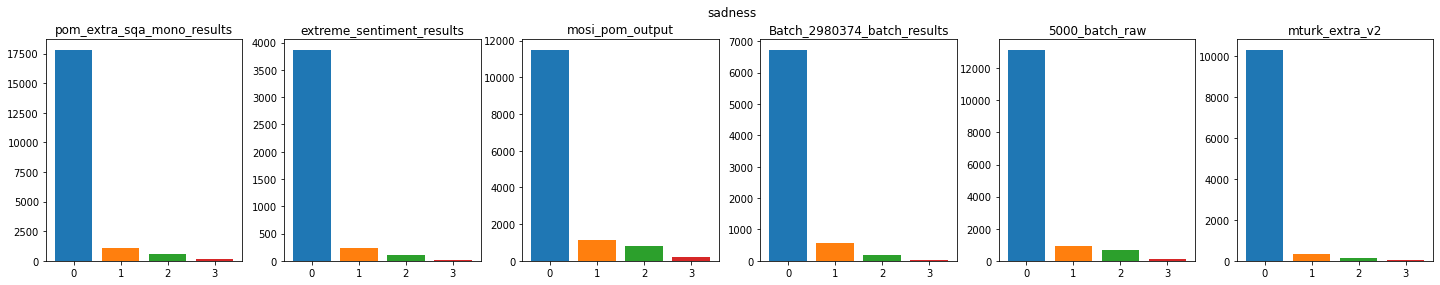

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


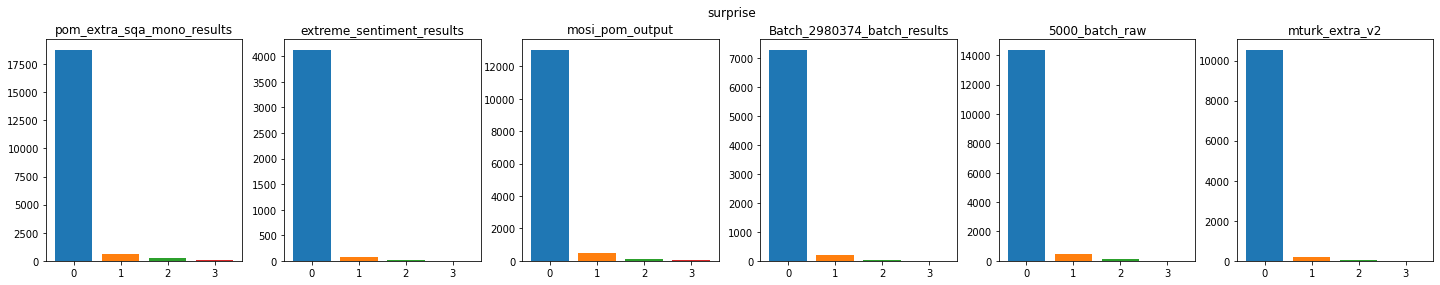

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [17]:
plot_emotions_modalities(dfs)

Is happiness more obvious?

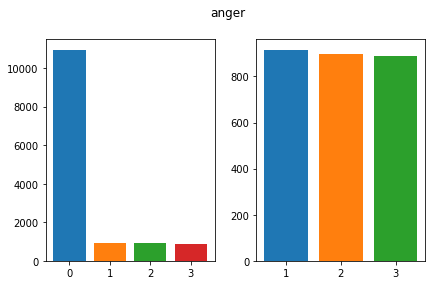

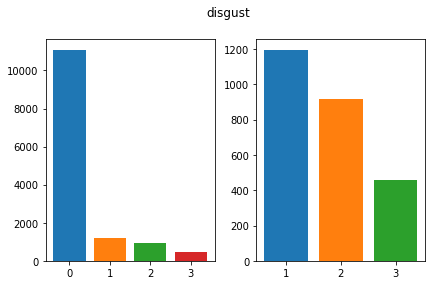

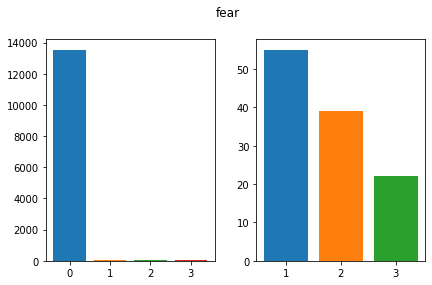

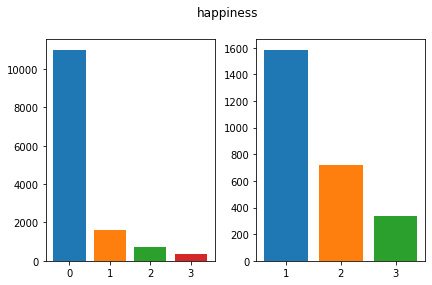

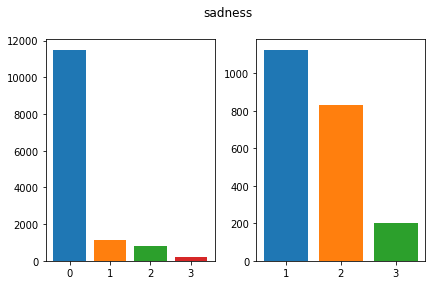

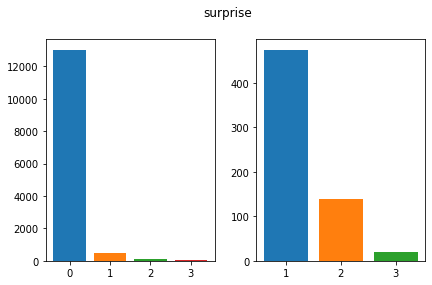

In [18]:
for emotion in emotions:
    distribution = dfs["mosi_pom_output"][f'Answer.{emotion}'].value_counts()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(emotion)
    fig.tight_layout()
    ax1.bar(distribution.index, distribution.values, color=colors.TABLEAU_COLORS)
    ax2.bar(distribution.index[1:], distribution.values[1:], color=colors.TABLEAU_COLORS)

In [64]:
def plot_sentiment_modalities(dataframes):
    df_distributions = [dataframes[df][sentiment_col].value_counts() for df in dataframes]
    fig, axes = plt.subplots(1, len(df_distributions), figsize=(20,4))
    fig.suptitle('sentiment')

    fig.tight_layout()

    for i in range(len(dataframes)):
        axes[i].bar(df_distributions[i].index, df_distributions[i].values, color=colors.TABLEAU_COLORS)
        axes[i].set_title(list(dataframes.keys())[i])
    plt.show()

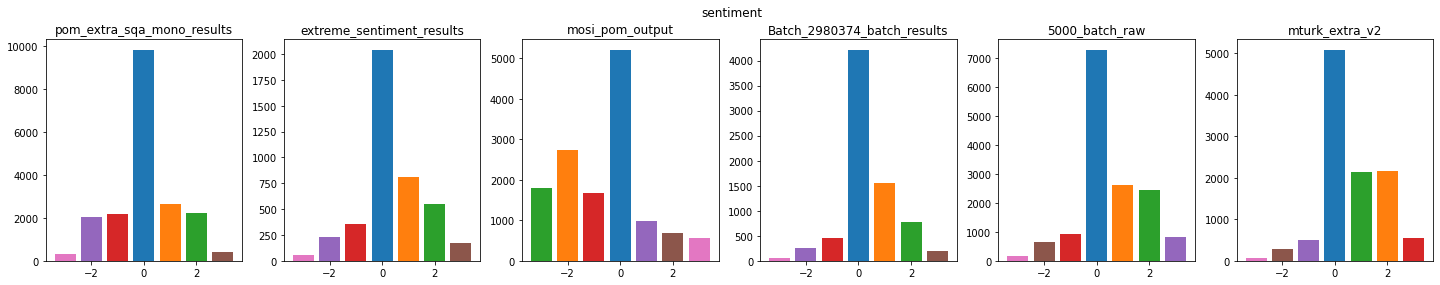

In [65]:
plot_sentiment_modalities(dfs)

In [21]:
def get_stds(values_emotions, values_sentiment):
    for kind, values in zip(["emotions", "sentiment"], [values_emotions, values_sentiment]):
        combs=list(product(values, repeat=3))
        stds=list(map(lambda abc: np.std(abc) ,combs))

        stds_df = pd.DataFrame(stds, index=combs, columns=[f"std_{kind}"])
        display(stds_df.drop_duplicates().sort_values(by=f"std_{kind}", ascending=False))

In [22]:
values_emotions = [0, 1, 2, 3]
values_sentiment = [-3, -2, -1, 0, 1, 2, 3]

get_stds(values_emotions, values_sentiment)

,std_emotions
"(0, 0, 3)",1.414214
"(0, 1, 3)",1.247219
"(0, 0, 2)",0.942809
"(0, 1, 2)",0.816497
"(0, 0, 1)",0.471405
"(0, 0, 0)",0.000000


,std_sentiment
"(-3, -3, 3)",2.828427
"(-3, -2, 3)",2.624669
"(-3, -1, 3)",2.494438
"(-3, 0, 3)",2.449490
"(-3, 2, 2)",2.357023
"(-3, -3, 2)",2.357023
"(-3, -2, 2)",2.160247
"(-3, -1, 2)",2.054805
"(-3, -3, 1)",1.885618
"(-3, -2, 1)",1.699673


In [23]:
dfs["mosi_pom_output"][dfs["mosi_pom_output"]['HITId'] == '301KG0KX9CXSA6Y0USGHQ4LUWZNH2D']

,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
AssignmentId,,,,,,,,
3JWH6J9I9TPHVZH16L97K0GEXKZNBJ,301KG0KX9CXSA6Y0USGHQ4LUWZNH2D,3,0,0,0,0,0,-2
3M0BCWMB8W87ITQFYM0UGJT5QXJWB1,301KG0KX9CXSA6Y0USGHQ4LUWZNH2D,0,0,0,0,0,0,-1
3TXD01ZLD5TA5QG1O7B6QH22VPY4UB,301KG0KX9CXSA6Y0USGHQ4LUWZNH2D,0,0,0,0,0,0,-1


In [24]:
agreements = {name: df.groupby(by='HITId') for name, df in dfs.items()}

In [25]:
agreements["mosi_pom_output"].std(0) # We have a population, so the denominator is N, not N-1

,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
HITId,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUWZN2HY,0.000000,0.000000,0.0,0.000000,0.942809,0.000000,0.816497
301KG0KX9CXSA6Y0USGHQ4LUWZNH2D,1.414214,0.000000,0.0,0.000000,0.000000,0.000000,0.471405
301KG0KX9CXSA6Y0USGHQ4LUWZO2HZ,1.414214,0.471405,0.0,0.000000,0.000000,0.000000,1.247219
301KG0KX9CXSA6Y0USGHQ4LUWZOH2E,0.942809,0.471405,0.0,0.471405,0.000000,0.000000,0.471405
301KG0KX9CXSA6Y0USGHQ4LUWZP2H0,0.000000,0.000000,0.0,0.471405,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL8YFTO6,0.000000,0.000000,0.0,0.471405,1.247219,0.471405,0.000000
3ZZAYRN1I63WMME0HKV3B0RL8YGOT2,0.942809,1.247219,0.0,0.000000,1.247219,0.000000,0.000000
3ZZAYRN1I63WMME0HKV3B0RL8YGTO7,0.942809,0.471405,0.0,0.000000,0.000000,0.000000,0.000000


In [171]:
# emotions

for name, agreement in agreements.items():
    has_consensus = (agreement[emotions_cols].std(0) == 0).all(axis=1)
    almost_consensus = (agreement[emotions_cols].std(0) < 0.48).all(axis=1)
    count = has_consensus.shape[0]

    print(name)
    print(' ' * 4, 'count:', count)
    print(' ' * 4, 'has consensus:', has_consensus.sum())
    print(' ' * 4, 'fraction:', has_consensus.sum()/count)
    print(' ' * 4, 'almost consensus:', almost_consensus.sum())
    print(' ' * 4, 'fraction:', almost_consensus.sum()/count)
    print()

pom_extra_sqa_mono_results
     count: 6546
     has consensus: 1641
     fraction: 0.2506874427131072
     almost consensus: 4116
     fraction: 0.6287809349220899

extreme_sentiment_results
     count: 1407
     has consensus: 276
     fraction: 0.19616204690831557
     almost consensus: 919
     fraction: 0.6531627576403696

mosi_pom_output
     count: 4552
     has consensus: 355
     fraction: 0.07798769771528999
     almost consensus: 1528
     fraction: 0.335676625659051

Batch_2980374_batch_results
     count: 2499
     has consensus: 339
     fraction: 0.13565426170468187
     almost consensus: 1639
     fraction: 0.6558623449379752

5000_batch_raw
     count: 5000
     has consensus: 861
     fraction: 0.1722
     almost consensus: 2790
     fraction: 0.558

mturk_extra_v2
     count: 3598
     has consensus: 767
     fraction: 0.2131739855475264
     almost consensus: 2355
     fraction: 0.6545302946081156



In [172]:
# sentiment
consensus = {}
    
for name, agreement in agreements.items():
    has_consensus = (agreement[sentiment_col].std(0) == 0)
    almost_consensus = (agreement[sentiment_col].std(0) < 0.48)
    count = has_consensus.shape[0]
    
    print(name)
    print(' ' * 4, 'count:', count)
    print(' ' * 4, 'almost consensus:', almost_consensus.sum())
    print(' ' * 4, 'fraction:', almost_consensus.sum()/count)
    print(' ' * 4, 'has consensus:', has_consensus.sum())
    print(' ' * 4, 'fraction:', has_consensus.sum()/count)
    print()
    consensus[name] = {}
    consensus[name]['has_consensus'] = has_consensus.sum()/count
    consensus[name]['almost_consensus'] = almost_consensus.sum()/count

pom_extra_sqa_mono_results
     count: 6546
     almost consensus: 4043
     fraction: 0.6176290864650168
     has consensus: 1697
     fraction: 0.25924228536510846

extreme_sentiment_results
     count: 1407
     almost consensus: 809
     fraction: 0.5749822316986496
     has consensus: 281
     fraction: 0.19971570717839374

mosi_pom_output
     count: 4552
     almost consensus: 2989
     fraction: 0.656634446397188
     has consensus: 1370
     fraction: 0.30096660808435854

Batch_2980374_batch_results
     count: 2499
     almost consensus: 1647
     fraction: 0.65906362545018
     has consensus: 650
     fraction: 0.2601040416166467

5000_batch_raw
     count: 5000
     almost consensus: 2851
     fraction: 0.5702
     has consensus: 1130
     fraction: 0.226

mturk_extra_v2
     count: 3598
     almost consensus: 1934
     fraction: 0.537520844913841
     has consensus: 709
     fraction: 0.1970539188438021



In [26]:
agreement_distributions = {name: agreement.std(0).mean().sort_values(ascending=False) for name, agreement in agreements.items()}

In [68]:
def plot_agreement(agreement_distributions):
    fig, axes = plt.subplots(2, 3, figsize=(20,10))
    fig.suptitle("Agreement disparity between datasets")
    for (name, agreement_distribution), (i,j) in zip(agreement_distributions.items(), product(range(2),range(3))):
        axes[i,j].bar(x=agreement_distribution.index.map(lambda x:x.split('.')[1]), height=agreement_distribution.values, color=colors.TABLEAU_COLORS)
        axes[i,j].set_title(name)
    fig.tight_layout()

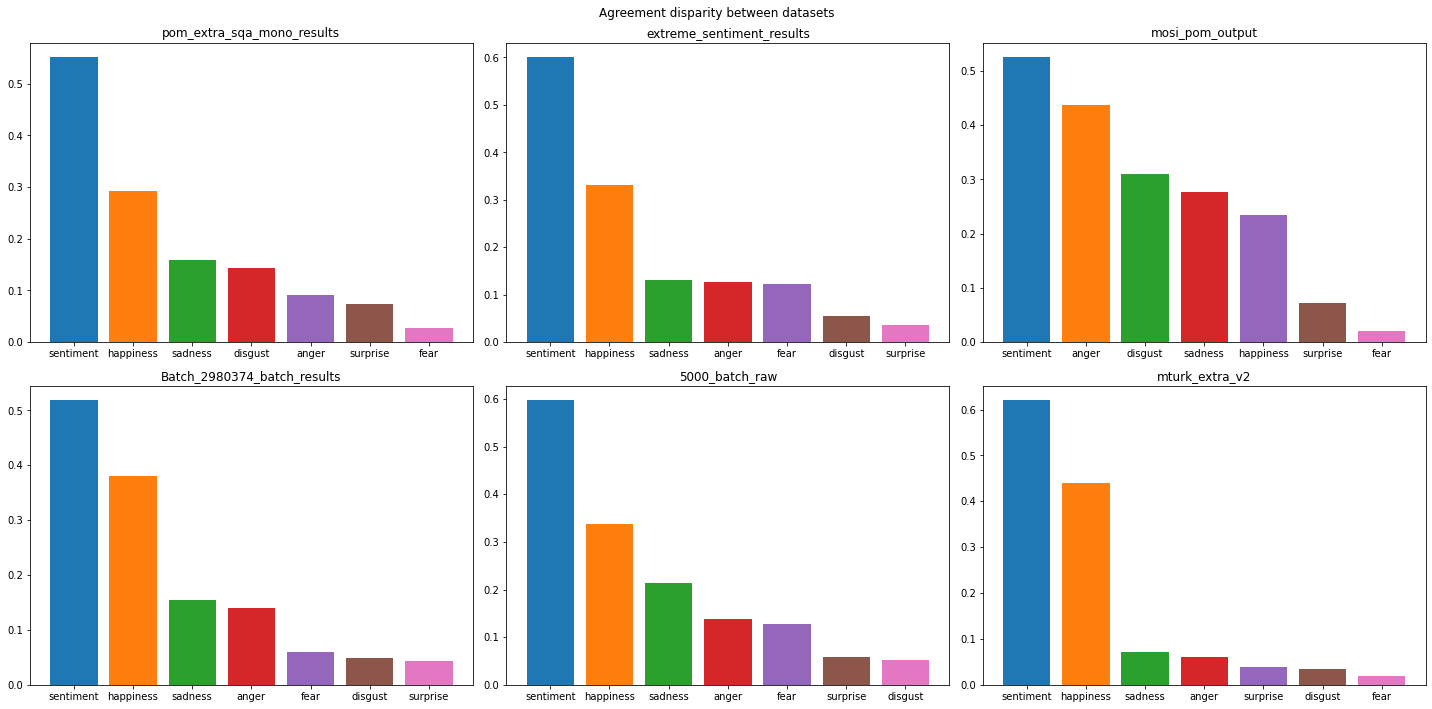

In [69]:
plot_agreement(agreement_distributions)

In [28]:
dfs_emotions = {name: df[emotions_cols] for name, df in dfs.items()}
series_sentiment = {name: df[sentiment_col] for name, df in dfs.items()}

In [29]:
dfs_emotions["mosi_pom_output"]

,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,
3L4D84MIL04V3MT2RFRBD42VJCTHJH,0,0,0,0,2,0
3PWWM24LHTA24FU1HQRD1ANFEIF28Y,0,1,0,0,1,0
3V0Z7YWSIZC0FRQEPJ2NTO7NPGM2V9,0,0,0,0,0,0
3300DTYQT3T05Z6DW43EP2H45R9QEH,0,0,0,0,0,0
3LBXNTKX0S73J0G8A7IKRWCMBXT9X0,0,0,0,0,0,0
...,...,...,...,...,...,...
3JBT3HLQF9EDGIWUSE22A7SCO76ZPR,0,0,0,0,0,0
3N4BPTXIO94VJS549ZYMXYRYSFNUKY,0,0,0,0,0,0
30IQTZXKALILN6SVABZRYLBT8ZXX0M,1,0,0,3,0,0


In [30]:
series_sentiment["mosi_pom_output"]

AssignmentId
3L4D84MIL04V3MT2RFRBD42VJCTHJH   -3
3PWWM24LHTA24FU1HQRD1ANFEIF28Y   -2
3V0Z7YWSIZC0FRQEPJ2NTO7NPGM2V9   -1
3300DTYQT3T05Z6DW43EP2H45R9QEH    0
3LBXNTKX0S73J0G8A7IKRWCMBXT9X0    0
                                 ..
3JBT3HLQF9EDGIWUSE22A7SCO76ZPR    0
3N4BPTXIO94VJS549ZYMXYRYSFNUKY    1
30IQTZXKALILN6SVABZRYLBT8ZXX0M    3
33SA9F9TRY65PW2Z8D2KHRZQTY2EWX    0
3QEMNNSB2YBL7BNY4AJOJTIO0VSD71    3
Name: Answer.sentiment, Length: 13656, dtype: int64

In [31]:
weights = {'sentiment': [], 'emotions': []}
for kind, dfs_kind in zip(['sentiment', 'emotions'], [series_sentiment, dfs_emotions]):
    print(kind)
    for name, df in dfs_kind.items():
        print(" " *4, name)
        count = df.shape[0]
        non_all_zero_line = ((df.sum(axis=1) if kind == 'emotions' else df) != 0).sum()
        weight = non_all_zero_line / count
        print(" " * 8, "count:", count)
        print(" " * 8, "non-all-zero-line:", non_all_zero_line)
        print(" " * 8, "weight:", weight)
        weights[kind].append(weight)

sentiment
     pom_extra_sqa_mono_results
         count: 19638
         non-all-zero-line: 9795
         weight: 0.4987778796211427
     extreme_sentiment_results
         count: 4221
         non-all-zero-line: 2179
         weight: 0.5162283819000237
     mosi_pom_output
         count: 13656
         non-all-zero-line: 8445
         weight: 0.6184094903339191
     Batch_2980374_batch_results
         count: 7497
         non-all-zero-line: 3281
         weight: 0.4376417233560091
     5000_batch_raw
         count: 14922
         non-all-zero-line: 7635
         weight: 0.5116606353035786
     mturk_extra_v2
         count: 10794
         non-all-zero-line: 5710
         weight: 0.5289975912544006
emotions
     pom_extra_sqa_mono_results
         count: 19638
         non-all-zero-line: 9115
         weight: 0.46415113555351867
     extreme_sentiment_results
         count: 4221
         non-all-zero-line: 2042
         weight: 0.4837716180999763
     mosi_pom_output
         count

In [32]:
for kind in ['sentiment', 'emotions']:
    print(kind)
    print(" " * 4, "Moyenne:", np.mean(weights[kind]))
    print(" " * 4, "Min:", np.min(weights[kind]))
    print(" " * 4, "Max:", np.max(weights[kind]))

sentiment
     Moyenne: 0.518619283628179
     Min: 0.4376417233560091
     Max: 0.6184094903339191
emotions
     Moyenne: 0.5259822436849985
     Min: 0.46415113555351867
     Max: 0.5862624487404804


Generally, one out of two observations have a non-neutral annotation.

In [33]:
for name, df in dfs_emotions.items():
    print(" " *4, name)
    count = df.shape[0]
    non_all_zero_line = ((df.sum(axis=1) if kind == 'emotions' else df) != 0).sum()
    weight = non_all_zero_line / count
    print(" " * 8, "count:", count)
    print(" " * 8, "non-all-zero-line:", non_all_zero_line)
    print(" " * 8, "weight:", weight)

     pom_extra_sqa_mono_results
         count: 19638
         non-all-zero-line: 9115
         weight: 0.46415113555351867
     extreme_sentiment_results
         count: 4221
         non-all-zero-line: 2042
         weight: 0.4837716180999763
     mosi_pom_output
         count: 13656
         non-all-zero-line: 8006
         weight: 0.5862624487404804
     Batch_2980374_batch_results
         count: 7497
         non-all-zero-line: 4136
         weight: 0.551687341603308
     5000_batch_raw
         count: 14922
         non-all-zero-line: 8022
         weight: 0.5375954965822276
     mturk_extra_v2
         count: 10794
         non-all-zero-line: 5747
         weight: 0.5324254215304799


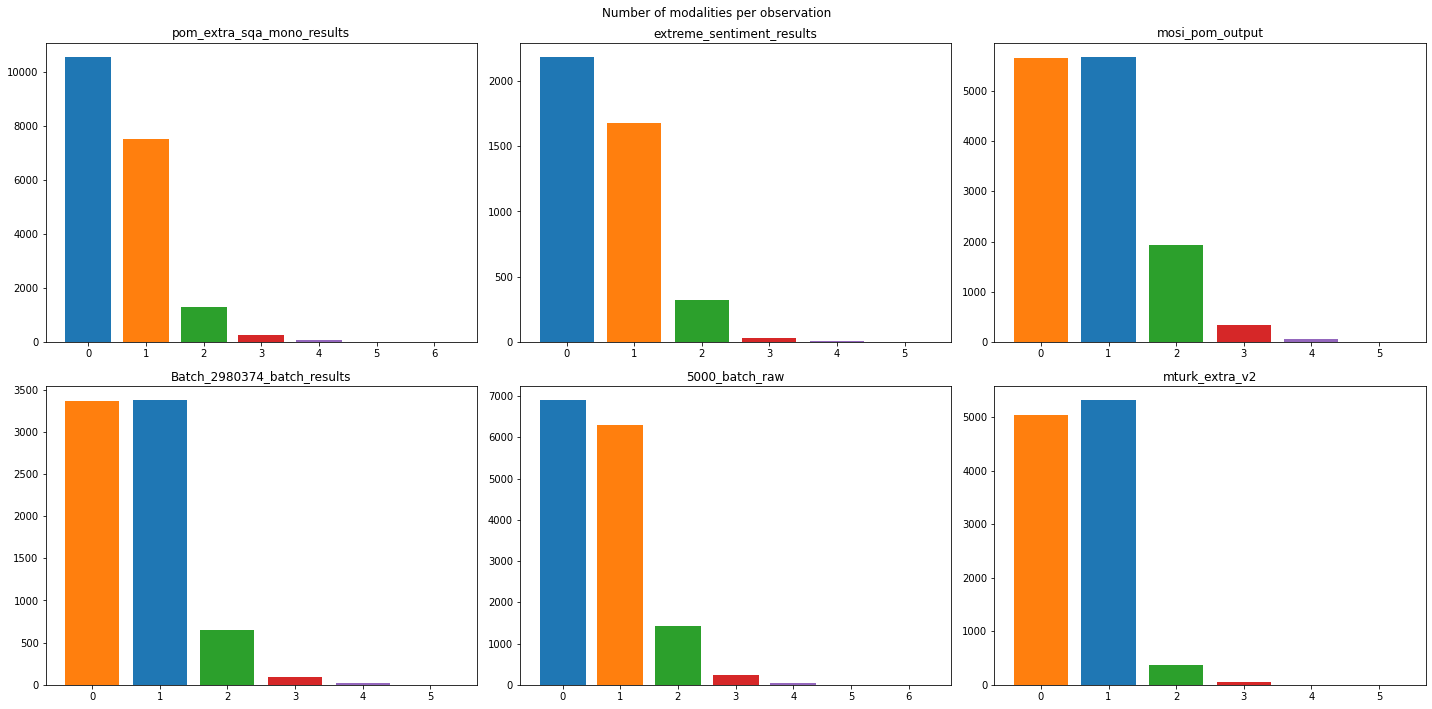

In [34]:
modality_distributions = {name: df.applymap(lambda x: x != 0).sum(axis=1).value_counts() for name, df in dfs_emotions.items()}

fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle("Number of modalities per observation")
for (name, modality_distribution), (i,j) in zip(modality_distributions.items(), product(range(2),range(3))):
    axes[i,j].bar(x=modality_distribution.index, height=modality_distribution.values, color=colors.TABLEAU_COLORS)
    axes[i,j].set_title(name)
fig.tight_layout()

In [35]:
outliers = {}

for name, df in dfs_emotions.items():
    outliers[name] = (df[df.applymap(lambda x: x != 0).sum(axis=1) >= 5].index)

In [36]:
for name, df in dfs_init.items():
    df = df.set_index('AssignmentId')
    outliers_HITId = df.loc[outliers[name]]['HITId'].values
    display(df[df['HITId'].map(lambda v: v in outliers_HITId)][['WorkerId', 'HITId'] + emotions_cols])

,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
32Z9ZLUT1MW94XKZ7SJGL0JHIS9HOE,A2R0YYUAWNT7UD,30IRMPJWDZV0GGGTF3YF449U1H6KRH,0,0,0,0,0,0
3E7TUJ2EGDYPLUBRJ7H8XP9UV1VD9O,ARVXIBUCA8WDZ,30IRMPJWDZV0GGGTF3YF449U1H6KRH,0,0,0,2,0,0
3OXV7EAXLF24LJ7WSB8K06WGEN763H,A2MCG5W6LHSRG9,30IRMPJWDZV0GGGTF3YF449U1H6KRH,2,2,1,1,1,0
304SM51WA4GEBC96EHQTJUQKK4NBS5,A2B8HPIZDKYKDR,334ZEL5JX6RV7M1LSKQD1VVZ7OYSOW,2,0,0,0,0,0
31Z0PCVWULRSO0JVQ0J3OX0A3XDT7T,AA9V4NE8SOA4I,334ZEL5JX6RV7M1LSKQD1VVZ7OYSOW,2,3,2,0,1,1
3U088ZLJVL56Y6N50635W2XMZDMW0J,A2EOOF9D135HQ1,334ZEL5JX6RV7M1LSKQD1VVZ7OYSOW,0,0,0,0,0,0
3J88R45B2HAOBNWFRWEHDMC1GM2XPG,A1FHS282JP487T,338GLSUI43N119OSTH7NE1MLFN7SFA,0,0,0,0,0,0
3KOPY89HM9EG9EM3CU299A1L0TW3JP,AA9V4NE8SOA4I,338GLSUI43N119OSTH7NE1MLFN7SFA,1,2,0,1,1,1
3TXWC2NHN02VNJU9GXCXSOVUW4TS9L,A2CFE6AZS73RNS,338GLSUI43N119OSTH7NE1MLFN7SFA,0,0,0,1,0,0


,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
32ZKVD547GZARVORO2PSBMI8RS73BV,AW4AHMQ7EN4QI,32TMVRKDGNA9K9CUV25Z66PTDQ784R,0,0,0,0,1,0
3C2NJ6JBKBTN7MH5NSGWJ7DA23S2NF,A37WXDYYT7RCZ0,32TMVRKDGNA9K9CUV25Z66PTDQ784R,1,1,1,0,1,2
3MHW492WW1PQMVU7Z1L78XLLUBEMVA,A2TBXASXZIRNNW,32TMVRKDGNA9K9CUV25Z66PTDQ784R,0,0,1,0,0,0


,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
3F6HPJW4JECDUGQJFT7JFQQ1WTIW2F,AKJ8CNFZH73K6,3AA88CN98PF9DHSFTYQ9C02R3VNKY2,1,1,0,0,3,0
3FE2ERCCZYK1HEINQ5RLU9L840ZPO5,A2TBXASXZIRNNW,3AA88CN98PF9DHSFTYQ9C02R3VNKY2,0,0,0,3,0,0
3U4J9857OFNSSEPEQESIO3UOX84B7C,A3GUJ6JD25FX7O,3AA88CN98PF9DHSFTYQ9C02R3VNKY2,1,1,1,1,1,0
3J2UYBXQQMO84R8Z9OQ1Y8Y9BUW06R,A2B8HPIZDKYKDR,3HYV4299H08RCB9NK8HCFS1KQJPE8Z,0,0,0,0,0,1
3QAPZX2QN5PKMQPYMMEY8VHXVPQ208,A3QC57KUVJP5EW,3HYV4299H08RCB9NK8HCFS1KQJPE8Z,1,1,1,0,2,2
3W8CV64QJ3B6XAGT530YOAOSNCL9HS,ARVXIBUCA8WDZ,3HYV4299H08RCB9NK8HCFS1KQJPE8Z,0,0,0,0,0,0
3RWE2M8QWIMGBCER85CI0JKV6J90NN,A2TBXASXZIRNNW,3OWZNK3RYL1XFS4KURNG9JAKQ7R2U1,2,2,0,0,0,0
3UJ1CZ6IZI1CMWSXD7ZGG8QSAQYS5I,A3CAF7LTD3ORSG,3OWZNK3RYL1XFS4KURNG9JAKQ7R2U1,2,2,0,1,2,1
3X4JMASXCNLEA3PU5F799OK1PV60BB,A2R0YYUAWNT7UD,3OWZNK3RYL1XFS4KURNG9JAKQ7R2U1,0,0,0,0,0,0


,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
3H0W84IWBLE0H0LD9JSEUSR9YQ4ERM,A2R0YYUAWNT7UD,3P4ZBJFX2VFU8Q51DMHOBQP6JPEWFG,1,0,0,0,1,0
3O6CYIULEEDMESZLYDHPL9LTCYEUWX,A34M93NJC830DP,3P4ZBJFX2VFU8Q51DMHOBQP6JPEWFG,3,0,0,0,2,0
3SBEHTYCWOFLU6ZLJXAZN3IYT6VYIM,A3GUJ6JD25FX7O,3P4ZBJFX2VFU8Q51DMHOBQP6JPEWFG,2,2,2,0,2,1
3FE7TXL1LJZ8AJUX3K8DN18F52VQ2G,A34M93NJC830DP,3XWUWJ18TL26Z4DMDBXMF25C8WIUUE,1,1,2,0,1,1
3GNA64GUZFG09GDKL3ABL8BRPBS5Q0,A2R0YYUAWNT7UD,3XWUWJ18TL26Z4DMDBXMF25C8WIUUE,0,0,0,1,0,0
3LKC68YZ3BFR1NFO2R5GM3T4UC0WOW,A3GUJ6JD25FX7O,3XWUWJ18TL26Z4DMDBXMF25C8WIUUE,0,0,0,1,0,0
3FIJLY1B6VG7B15UR28V7FCU9HBPFJ,A2R0YYUAWNT7UD,3XBXDSS888VVXIKN92G88M8XPN7XLG,0,0,0,0,0,0
3LPW2N6LKUES19K12CUGV98GS75U5N,A2DC7EBSBUVUQ,3XBXDSS888VVXIKN92G88M8XPN7XLG,1,1,1,0,1,1
3TDXMTX3CC6JBMPFDEF74CY5U5L6IV,A34M93NJC830DP,3XBXDSS888VVXIKN92G88M8XPN7XLG,0,0,0,0,0,0


,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
3OXV7EAXLF24LJ7WSB8K06WGCGE638,AYJGJAIY0EXW,3TRB893CSJMLWB0VGYFU1VQ1SSE7GS,0.0,0.0,0.0,1.0,0.0,0.0
3P1L2B7AD21BQT3PYDYEDSCOX1BOL3,A2TBXASXZIRNNW,3TRB893CSJMLWB0VGYFU1VQ1SSE7GS,3.0,2.0,2.0,1.0,2.0,1.0
3YGXWBAF71TEJWZ12GQ6WBGWM1V4CR,A2R0YYUAWNT7UD,3TRB893CSJMLWB0VGYFU1VQ1SSE7GS,1.0,0.0,0.0,0.0,0.0,0.0
3180JW2OT5OJNT97QDQ2O7Z5CMRJ5R,A170EDGL8ZWMSL,3OLZC0DJ8JR13S7MOKIDSLJKTNFIVP,0.0,0.0,0.0,0.0,0.0,0.0
3E47SOBEYR88R3YGN5SAQCQFROSICQ,A2DC7EBSBUVUQ,3OLZC0DJ8JR13S7MOKIDSLJKTNFIVP,1.0,2.0,1.0,0.0,1.0,1.0
3L2IS5HSFBUWRYQ76CQ2PQ82KNQUNP,A2R0YYUAWNT7UD,3OLZC0DJ8JR13S7MOKIDSLJKTNFIVP,0.0,0.0,0.0,1.0,0.0,0.0
3NVC2EB65RB643H2YU3CJXG9BVXY30,A2R2YZTSME1K3F,3SNR5F7R925K1HL0TUT3SHVYTSDEIG,0.0,0.0,1.0,1.0,0.0,3.0
3PEIJLRY6U5EVWTG3ISC5GKX7IOWXP,A2TBXASXZIRNNW,3SNR5F7R925K1HL0TUT3SHVYTSDEIG,2.0,2.0,0.0,2.0,2.0,2.0
3YHH42UU5CRQNCB6WSW3NRG6Z44L0V,AE861G0AY5RGT,3SNR5F7R925K1HL0TUT3SHVYTSDEIG,1.0,2.0,0.0,0.0,2.0,1.0


,WorkerId,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise
AssignmentId,,,,,,,,
32AT8R96GMLT7BICE87OOKI89JBSU8,A1U0GNE5ELW5V7,3ATYLI1PRTE28JIV5QHZ9U4CB3ZJOH,0,0,0,2,0,0
3H7Z272LX8JTBTFQDDBT2SHE98APLU,A1FHS282JP487T,3ATYLI1PRTE28JIV5QHZ9U4CB3ZJOH,0,0,0,1,0,0
3N4BPTXIO94VJS549ZYMXYRYSPYKUJ,A2RYRS301XIZZD,3ATYLI1PRTE28JIV5QHZ9U4CB3ZJOH,1,1,1,0,1,1


In [37]:
sample_name, sample_df = list(dfs_init.items())[0]
print(sample_name)
sample_df[sample_df['WorkerId'] == "AA9V4NE8SOA4I"].shape[0]

pom_extra_sqa_mono_results


575

# aggregation

In [60]:
dfs_agg = {name: pd.concat([dfs[name]['HITId'], df[emotions_cols].applymap(lambda v: v > 0 and 1 or 0), df[sentiment_col].map(lambda v: v < 0 and -1 or v > 0 and 1 or v)], axis=1) for name, df in dfs.items()}

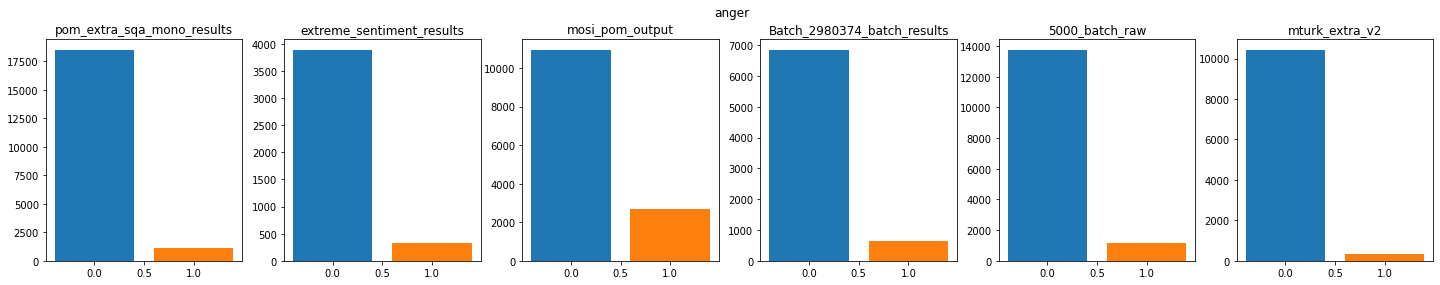

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


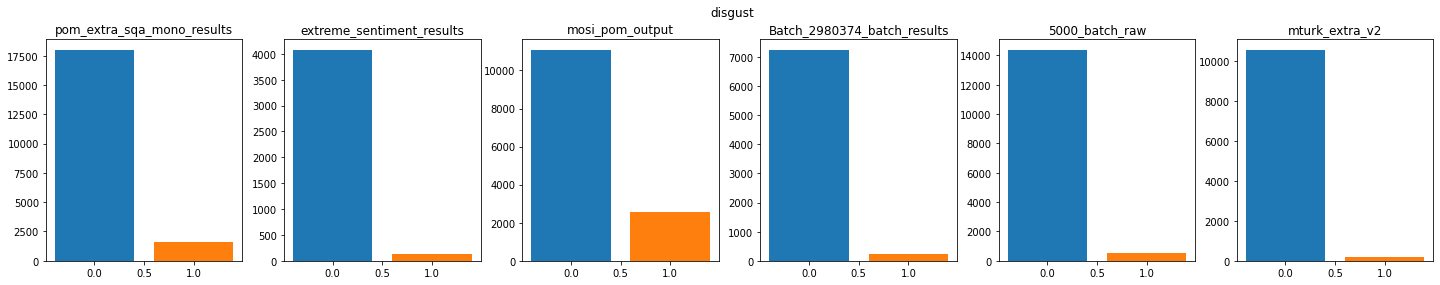

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


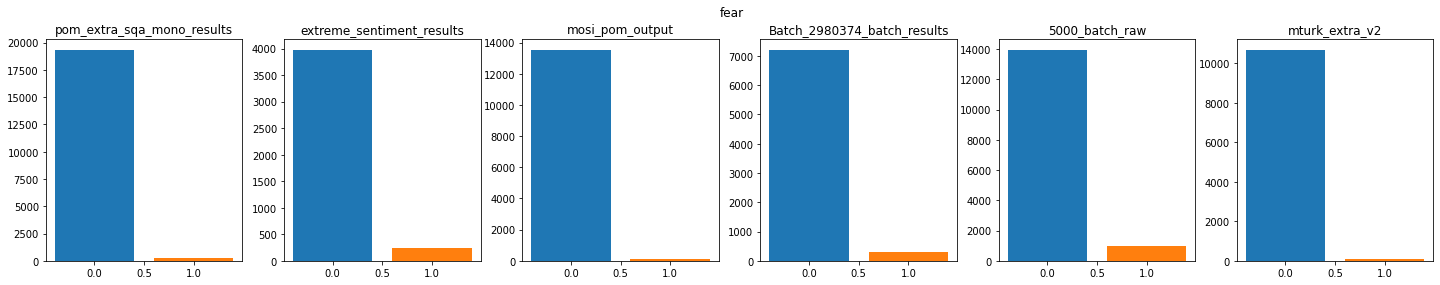

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


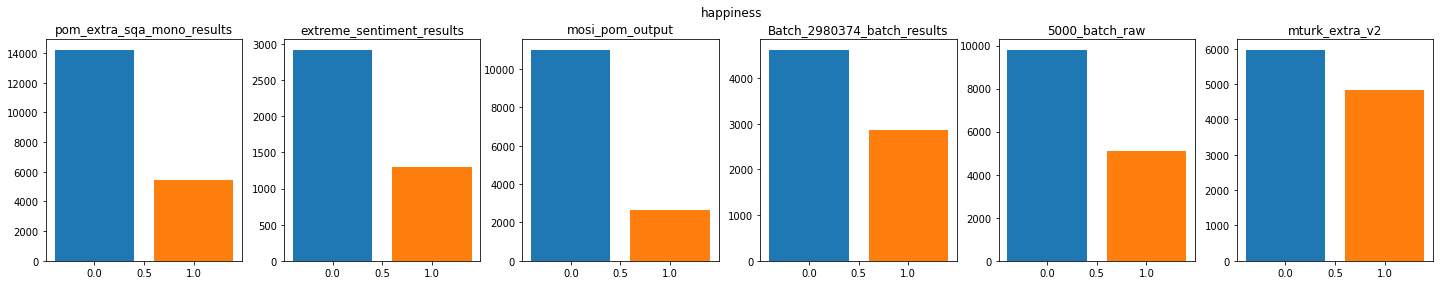

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


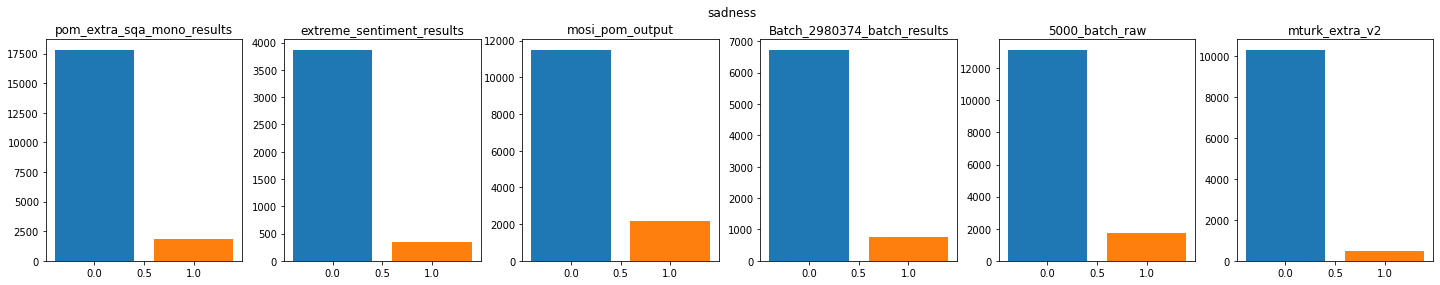

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


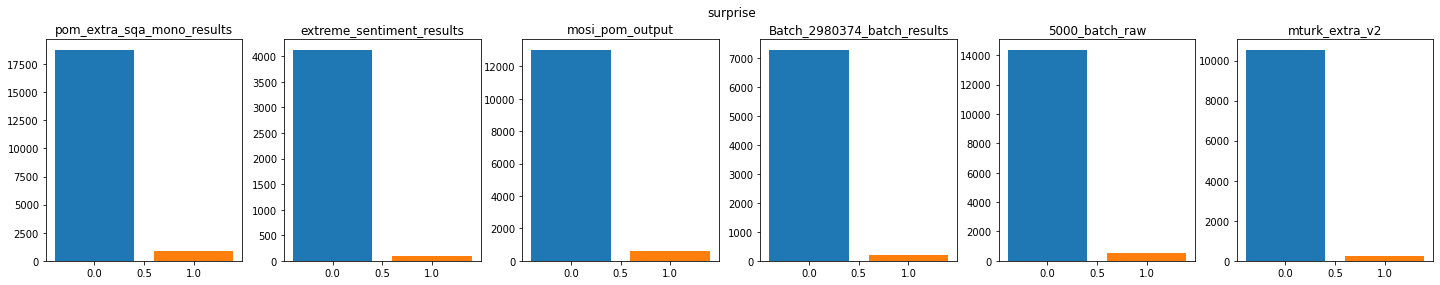

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [62]:
plot_emotions_modalities(dfs_agg)

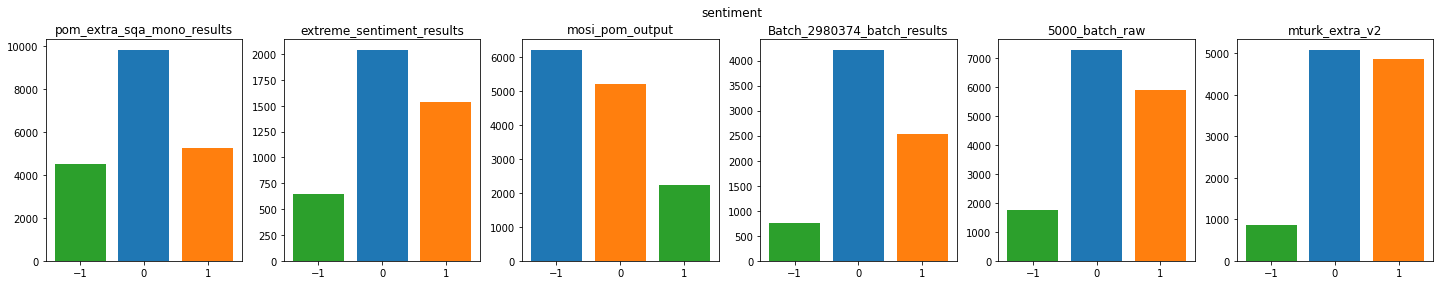

In [66]:
plot_sentiment_modalities(dfs_agg)

In [42]:
values_emotions = [0, 1]
values_sentiment = [-1, 0, 1]

get_stds(values_emotions, values_sentiment)

,std_emotions
"(0, 0, 1)",0.471405
"(0, 0, 0)",0.000000


,std_sentiment
"(-1, -1, 1)",0.942809
"(-1, 0, 1)",0.816497
"(-1, -1, 0)",0.471405
"(-1, -1, -1)",0.000000


In [99]:
dfs_agg['pom_extra_sqa_mono_results'][dfs_agg['pom_extra_sqa_mono_results']['HITId'] == '301KG0KX9CXSA6Y0USGHQ4LUX8MH2V']

,HITId,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
AssignmentId,,,,,,,,
3LUY3GC630CUW8QO9JAJJNZDEU5P7X,301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0,0,0,1,0,1,1
3OSWBBLG1F9FMQTPMNNMDSVC24EXDJ,301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0,0,0,0,0,0,1
3UN61F00HX10LHSKYIZBQYLWO6XR5B,301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0,0,0,1,1,0,1


In [100]:
agreements_agg = {name: df.groupby(by='HITId') for name, df in dfs_agg.items()}
agreements_agg['pom_extra_sqa_mono_results'].std(0)

,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
HITId,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,0.0,0.000000,0.0,0.471405,0.000000,0.000000,0.471405
301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0.0,0.000000,0.0,0.471405,0.471405,0.471405,0.000000
301KG0KX9CXSA6Y0USGHQ4LUX8N2HH,0.0,0.471405,0.0,0.000000,0.471405,0.000000,0.471405
301KG0KX9CXSA6Y0USGHQ4LUX8NH2W,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL97ETOO,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.471405
3ZZAYRN1I63WMME0HKV3B0RL97FOTK,0.0,0.471405,0.0,0.000000,0.000000,0.000000,0.471405
3ZZAYRN1I63WMME0HKV3B0RL97FTOP,0.0,0.000000,0.0,0.471405,0.000000,0.000000,0.471405


In [174]:
consensus_agg = {}

for name, agreement_agg in agreements_agg.items():
    has_consensus = (agreement_agg[sentiment_col].std(0) == 0)
    almost_consensus = (agreement_agg[sentiment_col].std(0) < 0.48)
    count = has_consensus.shape[0]
        
    print(name)    
    print(' ' * 4, 'count:', count)
    print(' ' * 4, 'almost consensus:', almost_consensus.sum())
    print(' ' * 4, 'fraction:', almost_consensus.sum()/count)
    print(' ' * 4, 'has consensus:', has_consensus.sum())
    print(' ' * 4, 'fraction:', has_consensus.sum()/count)
    print()
    consensus_agg[name] = {}
    consensus_agg[name]['has_consensus'] = has_consensus.sum()/count
    consensus_agg[name]['almost_consensus'] = almost_consensus.sum()/count

pom_extra_sqa_mono_results
     count: 6546
     almost consensus: 6029
     fraction: 0.9210204705163458
     has consensus: 2605
     fraction: 0.397952948365414

extreme_sentiment_results
     count: 1407
     almost consensus: 1290
     fraction: 0.9168443496801706
     has consensus: 485
     fraction: 0.3447050461975835

mosi_pom_output
     count: 4552
     almost consensus: 4311
     fraction: 0.9470562390158173
     has consensus: 2773
     fraction: 0.609182776801406

Batch_2980374_batch_results
     count: 2499
     almost consensus: 2355
     fraction: 0.9423769507803121
     has consensus: 927
     fraction: 0.3709483793517407

5000_batch_raw
     count: 5000
     almost consensus: 4636
     fraction: 0.9272
     has consensus: 1880
     fraction: 0.376

mturk_extra_v2
     count: 3598
     almost consensus: 3374
     fraction: 0.9377431906614786
     has consensus: 1260
     fraction: 0.35019455252918286



In [188]:
consensus_dfs = {name: pd.DataFrame([res.values(), consensus_agg[name].values()], columns=['sentiment', 'sentiment_agg'], index = ['has_consensus', 'almost_consensus']) for name, res in consensus.items()}

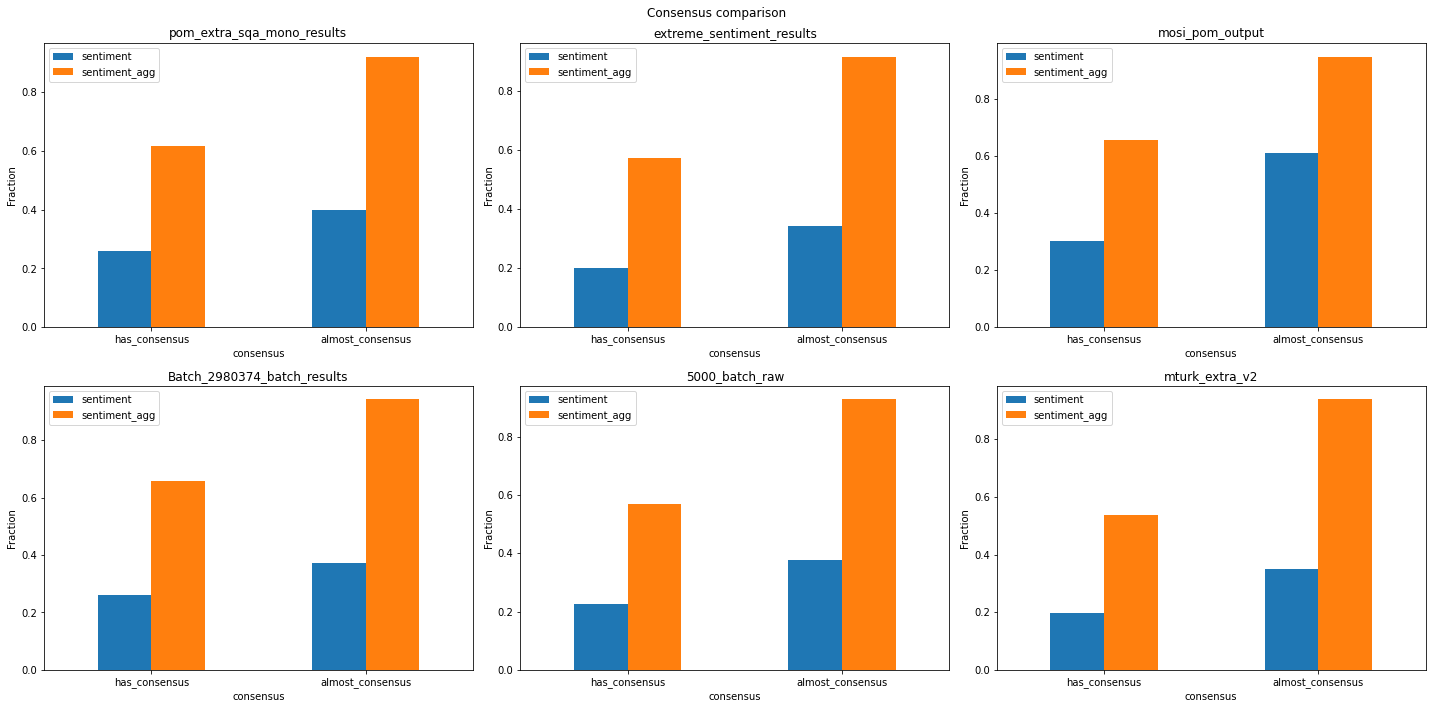

In [194]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle("Consensus comparison")
for (name, consensus_df), (i,j) in zip(consensus_dfs.items(), product(range(2),range(3))):
    consensus_df.plot(kind="bar", title=name, xlabel="consensus", ylabel="Fraction", rot=0, ax=axes[i,j])
    axes[i,j].set_title(name)
fig.tight_layout()

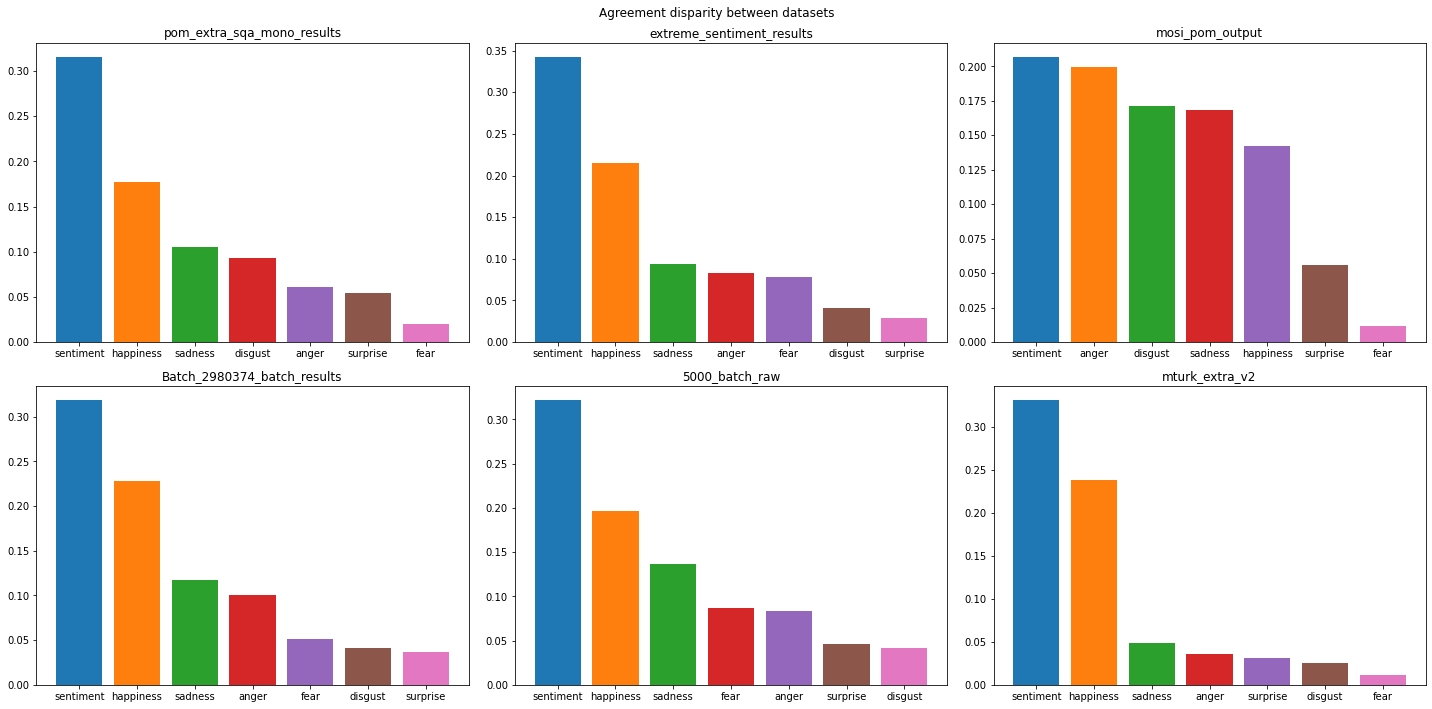

In [70]:
agreement_distributions_agg = {name: agreement_agg.std(0).mean().sort_values(ascending=False) for name, agreement_agg in agreements_agg.items()}

plot_agreement(agreement_distributions_agg)

# correlation

In [72]:
dfs_emotions_agg = {name: df[emotions_cols] for name, df in dfs_agg.items()}
series_sentiment_agg = {name: df[sentiment_col] for name, df in dfs_agg.items()}

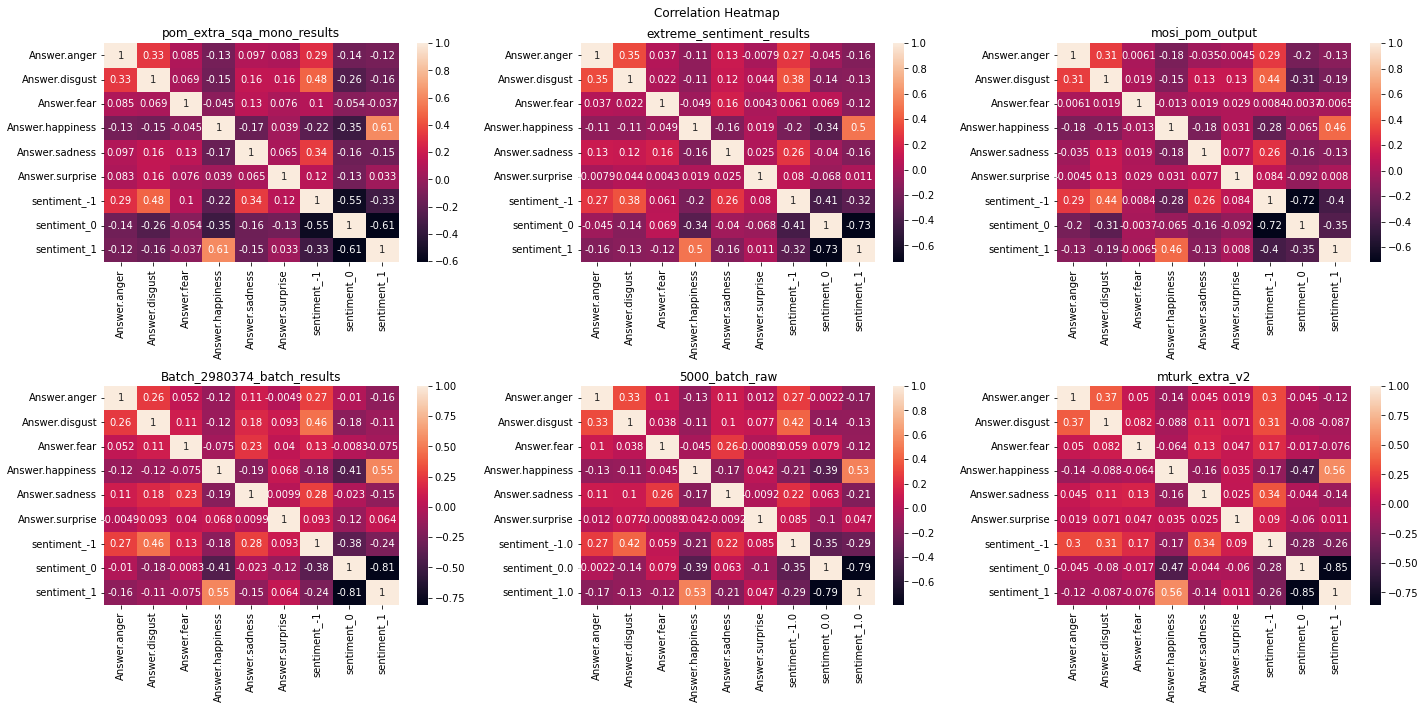

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle("Correlation Heatmap")
for (name, df), (i,j) in zip(dfs_emotions_agg.items(), product(range(2),range(3))):
    sns.heatmap(pd.concat([df, pd.get_dummies(series_sentiment_agg[name], prefix='sentiment')], axis=1).corr(), annot=True, ax=axes[i,j])
    axes[i,j].set_title(name)
fig.tight_layout()

# ACM

In [212]:
merged_dfs = {}
initial_shape = 0

for  name, agreement_agg in agreements_agg.items():
    all_modalities = agreement_agg[emotions_cols + [sentiment_col]]
    merged_dfs[name] = all_modalities.median()[(all_modalities.std(0) < 0.48).all(axis=1)]
    initial_shape += all_modalities.median().shape[0]

print(initial_shape)

23602


In [270]:
full_df = pd.concat(list(merged_dfs.values()))
full_df

,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
HITId,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0.0,0.0,0.0,1.0,0.0,0.0,1.0
301KG0KX9CXSA6Y0USGHQ4LUX8N2HH,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
301KG0KX9CXSA6Y0USGHQ4LUX8NH2W,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL95PTOV,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3ZZAYRN1I63WMME0HKV3B0RL95QOTR,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3ZZAYRN1I63WMME0HKV3B0RL95QTOW,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [304]:
print("Nous avons une perte de", initial_shape - full_df.shape[0], "unités, soit", (initial_shape - full_df.shape[0]) / full_df.shape[0], "du jeu de données aggrégées.")

Nous avons une perte de 1624 unités, soit 0.07389207389207389 du jeu de données aggrégées.


## Représentation des données sous la forme d'un tableau disjonctif (TDC)

In [302]:
for value in [*emotions, "sentiment"]:
    full_df[f"Answer.{value}"] = full_df[f"Answer.{value}"].map(lambda v: value + "_" + str(int(v)))

In [303]:
full_df

,Answer.anger,Answer.disgust,Answer.fear,Answer.happiness,Answer.sadness,Answer.surprise,Answer.sentiment
HITId,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_1
301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_0
301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,anger_0,disgust_0,fear_0,happiness_1,sadness_0,surprise_0,sentiment_1
301KG0KX9CXSA6Y0USGHQ4LUX8N2HH,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_-1
301KG0KX9CXSA6Y0USGHQ4LUX8NH2W,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_0
...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL95PTOV,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_0
3ZZAYRN1I63WMME0HKV3B0RL95QOTR,anger_0,disgust_0,fear_0,happiness_0,sadness_0,surprise_0,sentiment_1
3ZZAYRN1I63WMME0HKV3B0RL95QTOW,anger_0,disgust_0,fear_0,happiness_1,sadness_0,surprise_0,sentiment_1


In [305]:
tdc = pd.get_dummies(full_df)
display(tdc)

,Answer.anger_anger_0,Answer.anger_anger_1,Answer.disgust_disgust_0,Answer.disgust_disgust_1,Answer.fear_fear_0,Answer.fear_fear_1,Answer.happiness_happiness_0,Answer.happiness_happiness_1,Answer.sadness_sadness_0,Answer.sadness_sadness_1,Answer.surprise_surprise_0,Answer.surprise_surprise_1,Answer.sentiment_sentiment_-1,Answer.sentiment_sentiment_0,Answer.sentiment_sentiment_1
HITId,,,,,,,,,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1
301KG0KX9CXSA6Y0USGHQ4LUX8N2HH,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
301KG0KX9CXSA6Y0USGHQ4LUX8NH2W,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL95PTOV,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
3ZZAYRN1I63WMME0HKV3B0RL95QOTR,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
3ZZAYRN1I63WMME0HKV3B0RL95QTOW,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1


$m$ : nombre de modalités;

$p$ : nombre de variables;

$n$ : nombre d'individus.

$\forall e \in \{1,2,\dots,6\}, m_e = 2$, $m_s=3$ $\rightarrow m = 15$

$p = 7$

$n = 21978$

In [306]:
m = tdc.shape[1]
p = full_df.shape[1]
n = full_df.shape[0]
m,p,n

(15, 7, 21978)

## Détermination du profile (patron) moyen c
## $c = (\dots, \frac {n_s} {np}, \dots) \rightarrow$ vecteur des poids des modalités

In [307]:
np = n * p
ns_vect = tdc.sum()

c = ns_vect / np
c.name = "c"
print(c)

Answer.anger_anger_0             0.136643
Answer.anger_anger_1             0.006214
Answer.disgust_disgust_0         0.136312
Answer.disgust_disgust_1         0.006546
Answer.fear_fear_0               0.142350
Answer.fear_fear_1               0.000507
Answer.happiness_happiness_0     0.101875
Answer.happiness_happiness_1     0.040983
Answer.sadness_sadness_0         0.136078
Answer.sadness_sadness_1         0.006780
Answer.surprise_surprise_0       0.141466
Answer.surprise_surprise_1       0.001391
Answer.sentiment_sentiment_-1    0.027515
Answer.sentiment_sentiment_0     0.072417
Answer.sentiment_sentiment_1     0.042926
Name: c, dtype: float64


## Détermination de la matrice des profils-colonnes
## $M_{profils-colonnes} = \frac {k_{is}} {ns}$
## $r = (\dots, \frac {1} {n}, \dots) \rightarrow$ vecteur des poids des individus

In [308]:
M_profils_colonnes = tdc / ns_vect

display(M_profils_colonnes.assign(r = 1/n))

,Answer.anger_anger_0,Answer.anger_anger_1,Answer.disgust_disgust_0,Answer.disgust_disgust_1,Answer.fear_fear_0,Answer.fear_fear_1,Answer.happiness_happiness_0,Answer.happiness_happiness_1,Answer.sadness_sadness_0,Answer.sadness_sadness_1,Answer.surprise_surprise_0,Answer.surprise_surprise_1,Answer.sentiment_sentiment_-1,Answer.sentiment_sentiment_0,Answer.sentiment_sentiment_1,r
HITId,,,,,,,,,,,,,,,,
301KG0KX9CXSA6Y0USGHQ4LUX8L2HF,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000000,0.00000,0.000151,0.000046
301KG0KX9CXSA6Y0USGHQ4LUX8M2HG,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000000,0.00009,0.000000,0.000046
301KG0KX9CXSA6Y0USGHQ4LUX8MH2V,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000000,0.000159,0.000048,0.0,0.000046,0.0,0.000000,0.00000,0.000151,0.000046
301KG0KX9CXSA6Y0USGHQ4LUX8N2HH,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000236,0.00000,0.000000,0.000046
301KG0KX9CXSA6Y0USGHQ4LUX8NH2W,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000000,0.00009,0.000000,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3ZZAYRN1I63WMME0HKV3B0RL95PTOV,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000000,0.00009,0.000000,0.000046
3ZZAYRN1I63WMME0HKV3B0RL95QOTR,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000064,0.000000,0.000048,0.0,0.000046,0.0,0.000000,0.00000,0.000151,0.000046
3ZZAYRN1I63WMME0HKV3B0RL95QTOW,0.000048,0.0,0.000048,0.0,0.000046,0.0,0.000000,0.000159,0.000048,0.0,0.000046,0.0,0.000000,0.00000,0.000151,0.000046


## Analyse du nombre de facteurs principaux à retenir
On garde au plus $r = m-p$ axes factoriels (le nombre de valeurs propres non nulles).

Une première approches est de garder les valeurs propres $\lambda_q$ telles qu'elles sont supérieures à la moyenne $\frac{1}{p}$. C'est la règle de Kaiser.

In [309]:
r = m - p
print("Nombre de facteurs à retenir:", r)

Nombre de facteurs à retenir: 8


In [310]:
mca = MCA(row_labels = tdc.index.values, var_labels = full_df.columns.values)
mca.fit(full_df.to_numpy())

MCA(row_labels=array(['301KG0KX9CXSA6Y0USGHQ4LUX8L2HF', '301KG0KX9CXSA6Y0USGHQ4LUX8M2HG',
       '301KG0KX9CXSA6Y0USGHQ4LUX8MH2V', ...,
       '3ZZAYRN1I63WMME0HKV3B0RL95QTOW', '3ZZAYRN1I63WMME0HKV3B0RL95ROTS',
       '3ZZAYRN1I63WMME0HKV3B0RL95RTOX'], dtype=object),
    var_labels=array(['Answer.anger', 'Answer.disgust', 'Answer.fear',
       'Answer.happiness', 'Answer.sadness', 'Answer.surprise',
       'Answer.sentiment'], dtype=object))

L'attribut `.eig_` contient :

- en 1ère ligne : les valeurs propres en valeur absolue
- en 2ème ligne : les valeurs propres en pourcentage de la variance totale
- en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [311]:
pd.DataFrame(mca.eig_.round(2), index = ["Valeur propre", "%", "Cumul %"], columns=range(1,9))

,1,2,3,4,5,6,7,8
Valeur propre,0.28,0.20,0.15,0.14,0.13,0.10,0.08,0.06
%,24.73,17.41,13.18,12.29,11.65,8.47,7.04,5.22
Cumul %,24.73,42.14,55.32,67.61,79.27,87.74,94.78,100.00


On doit retenir les facteurs principaux tels que $\lambda_i \gt \frac{1}{p} \rightarrow \lambda_i \gt \frac {1}{8} = 0.125$. Si l'on regarde le tableau précédent, alors on retiendrait les 5 premiers facteurs principaux. Avec 5, il ne reste plus qu'envrion 20% de variance non expliquée.

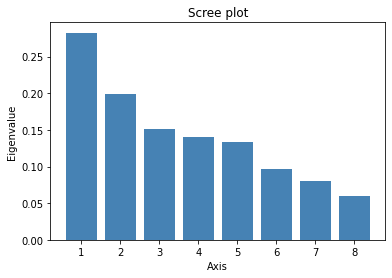

In [312]:
mca.plot_eigenvalues()

Si l'on y va plutôt selon la règle de Coude, alors on opterait pour 2 ou 3 facteurs principaux, ce qui donne une variance totale cumulée de 42 ou 55%.

Pour obtenir une indication plus réaliste sur la qualité des facteurs, on peut utiliser la correction de Benzécri:
$$\hat{\lambda}_k = \left [ \left ( \frac{p}{p-1} \right ) \left ( \lambda_k - \frac{1}{p} \right ) \right ] ^2$$

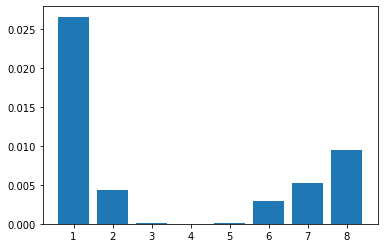

In [313]:
corrected_eigenvalues = list(map(lambda l_k: ((p/(p-1)) * (l_k-(1/p))) ** 2, mca.eig_[0]))
plt.bar(range(1,9), corrected_eigenvalues)
plt.show()

On peut voir que les facteurs principaux n'ont plus les mêmes poids!

## Détermination de la contribution des variables aux 2 premiers axes factoriels
## $Ctr_\alpha(s) = \frac{n_s}{np}\cdot\frac{y^2_{s\alpha}}{\lambda_\alpha}$
Encore une fois, on peut obtenir la contribution des variables directement à partir de l'attribut `.col_contrib_`.

In [314]:
mca.col_contrib_.T[i].T

array([2.63090913e-01, 5.78524809e+00, 4.28124865e-01, 8.91579598e+00,
       3.00059947e-06, 8.42476006e-04, 8.55903278e+00, 2.12760858e+01,
       6.31075964e-03, 1.26668987e-01, 2.06689319e-02, 2.10204970e+00,
       4.39676722e+00, 2.49690699e+01, 2.31502406e+01])

,1
Answer.sentiment_sentiment_-1,23.917428
Answer.disgust_disgust_1,19.976459
Answer.anger_anger_1,15.759951
Answer.happiness_happiness_1,12.307472
Answer.sentiment_sentiment_1,11.091371
Answer.sadness_sadness_1,8.453532
Answer.happiness_happiness_0,4.951101
Answer.disgust_disgust_0,0.959243
Answer.anger_anger_0,0.716702
Answer.surprise_surprise_1,0.646106


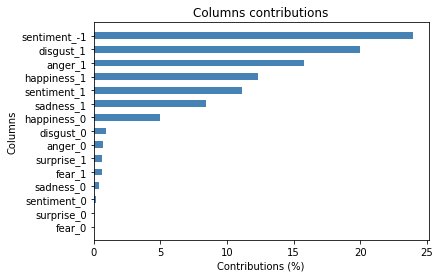

,2
Answer.sentiment_sentiment_0,24.969070
Answer.sentiment_sentiment_1,23.150241
Answer.happiness_happiness_1,21.276086
Answer.disgust_disgust_1,8.915796
Answer.happiness_happiness_0,8.559033
Answer.anger_anger_1,5.785248
Answer.sentiment_sentiment_-1,4.396767
Answer.surprise_surprise_1,2.102050
Answer.disgust_disgust_0,0.428125
Answer.anger_anger_0,0.263091


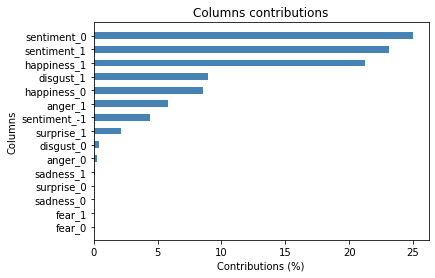

In [315]:
for i in range(2):
    display(pd.DataFrame(mca.col_contrib_.T[i].T, index=tdc.columns, columns=range(i+1,i+2)).sort_values(by=i+1,ascending=False))
    mca.plot_col_contrib(num_axis=i+1)

- La contribution d’une modalité $s$ à un axe dépend de sa fréquence $n_s$.

Donc, pour le premier axe, `sentiment_-1`, `disgust_1`, `anger_1` sont les modalités qui ont la plus grande fréquence, et donc ce sont celles qui contribuent le plus à l'inertie. Le deuxième axe est davantage défini par `sentiment_0`, `sentiment_1` et `happiness_1`.

## Représentation graphique des variables

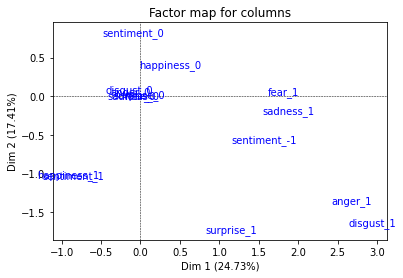

In [323]:
mca.mapping_col(num_x_axis=1, num_y_axis=2)

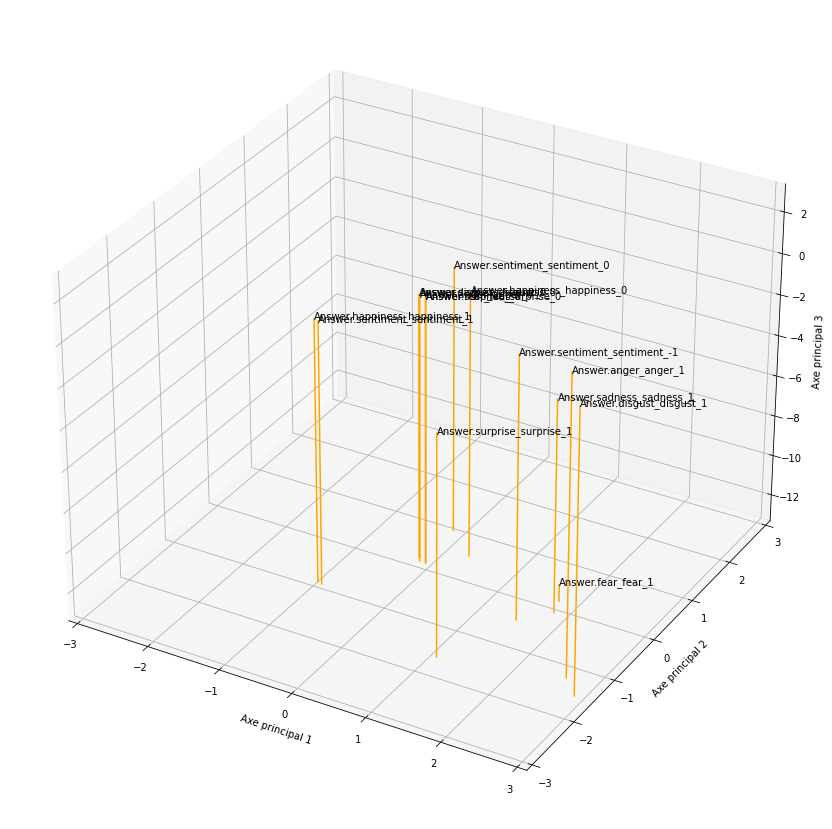

In [356]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

for r, i in zip(mca.col_coord_[:,:3], tdc.columns):
    label = i
    ax.text(r[0], r[1], r[2], label)
    ax.plot3D([r[0],r[0]], [r[1],r[1]], [r[2],-13], c='orange')

# Tweaking display region and labels
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-13, 3)
ax.set_xlabel('Axe principal 1')
ax.set_ylabel('Axe principal 2')
ax.set_zlabel('Axe principal 3')

plt.show()